# Initial setup

In [11]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install matplotlib

     |████████████████████████████████| 10.3 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 1.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [18]:
from PIL import Image
from tqdm import tqdm
from tifffile import imsave
from sklearn.decomposition import PCA
import numpy as np
import os

In [19]:
input_path = './input'
output_path = './output'

In [20]:
input_files = [filename for filename in os.listdir(input_path)]
print(f'input_files ({len(input_files)}): {input_files}')

input_files (1): ['cdb7078273040c6d9369dc04edff28e8-e1501609687104.jpg']


In [28]:
new_files = []

for image_file in tqdm(input_files, desc='Parsing files'):
    # Read image
    image_path = os.path.join(input_path, image_file)
    image = Image.open(image_path)
    image_sequence = image.getdata()
    image_array = np.array(image_sequence)
    h, w, _ = np.asarray(image).shape
    
    # Use pca transformation to parse image
    pca = PCA(n_components=3)
    pca.fit(image_array)
    output = pca.transform(image_array)
    
    # Save output as tif
    new_filename = f'{image_file.split(".")[0]}.tif'
    imsave(os.path.join(output_path, new_filename), output.reshape(h, w, 3))
    new_files.append(new_filename)
print(f'Parsed files: {new_files}')

Parsing files: 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]

Parsed files: ['cdb7078273040c6d9369dc04edff28e8-e1501609687104.tif']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


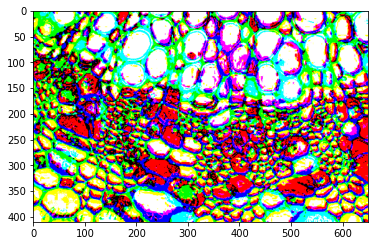

In [32]:
%matplotlib inline
from matplotlib.pyplot import imshow
from tifffile import imread

file = 'cdb7078273040c6d9369dc04edff28e8-e1501609687104.tif'

data = imread(os.path.join(output_path, file))
imshow(data)